# MIT-BIH Arrhythmia Data Analysis

## Overview

- Set of over 4000 long-term Holter Recordings
- Obtained by the Beth Israel Hospital Arrhythmia Laboratory
- Obtained betwee 1975 and 1979
- **60% of the recordings were obtainer from inpatients**
- **23 records in total chosen from id 100-124 inclusive (Group A)**
- **25 records chosen from ids 200-234 inclusive (Group B)**
- **Total there are 48 records**
- **Each record is 30 minutes long**
- **2 signals recorded**
- Group B records were chosen to include complex ventricular,junctional and supraventricular arrhythmias and conduction abnormalities
- Subjects were 25 men aged 32 to 89 years, 22 women aged 23 to 89 years.
- Records 201 and 202 came from the same male subject

## ECG Lead Configuration
- Most records the first signal seen is the modified limb lead II(MLII) obtained by placing the electrodes on the chest
- The lower signal is a modified lead V1
- QRS Complexes are seen in the MLII signal only
- Normal beats are difficult to discern in the lower signal

## Exceptions

- Record 114 the signals are reversed .i.e MLII is the second signal.
- Records 102 and 104 do not have MLII signal because of surgical dressing, modified lead V5 used for the upped signal.
- 4 records (102,104,107,217) include paced beats 


## Digitisation process

The digitization process happend at **360Hz**
The ADCs were unipolar, with 11 bit resolution ranging from +5mv to -5mV
Sample values range from 0 to 2047 inclusive with a value of 1024 corresponding to 0

A number of frequency-domain artifacts have been identified and related to specific mechanical components of the recorders and the playback unit:


| Frequency(Hz)     | Source |
| ----------- | ----------- |
| 0.042      | Recorder pressure wheel       |
| 0.083   | Playback unit capstan     |
| 0.090 | Recorder capstan |
|0.167 | Playback unit capstan |
| 0.10-0.18 |Takeup reel |
| 0.20-0.36 | Supply reel  |


- **Bit Depth(n)**: 11
- **Levels(2<sup>n</sup>)**:2048
- **Voltage Range(r)**: 10mV
- **Step Size(delta)**: 4.88x10<sup>-3</sup>mV
- **Maximum Voltage**: 5mV
- **Minimum Voltage**: -5mV

Calculations:
```
Index = Round((Xalpha - Xmin)/delta) # Calculate the corresponding discrete value for a voltage

Xalpha = Xmin + (Index*delta) # Calculate the corresponding voltage for a discrete value.
```

## Exploration

In [1]:
from data_set_utils.data_reader import DataReader

In [2]:
%matplotlib inline

In [3]:
path = "/mnt/d/git/Arrhythmia-Detection/raw_data/mit-bih-arrhythmia-database-1.0.0"
dr = DataReader(path, 11, 5, -5)
columns = ["N", "/", "R", "L", "V", "gender", "age", "leads"]
symbols_of_interest = ["N", "/", "R", "L", "V"]

### Example Record

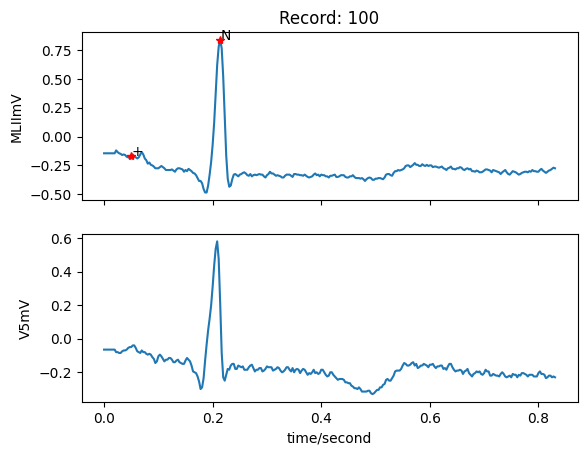

In [4]:
dr.plot_record("100", 300)

In [5]:
from utils.common_utils import load_patient_ids

In [6]:
patient_ids = load_patient_ids(path)

In [7]:
patient_ids.remove("102-0")

In [8]:
patient_ids

['100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '121',
 '122',
 '123',
 '124',
 '200',
 '201',
 '202',
 '203',
 '205',
 '207',
 '208',
 '209',
 '210',
 '212',
 '213',
 '214',
 '215',
 '217',
 '219',
 '220',
 '221',
 '222',
 '223',
 '228',
 '230',
 '231',
 '232',
 '233',
 '234']

In [9]:
len(patient_ids)

48

### Loading all patient records

In [10]:
records = dr.load_records(record_ids=patient_ids)

#### Counting annotations in all records

In [11]:
from data_set_utils.data_reader import count_annotations

In [12]:
count_tuple = count_annotations(records)

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.DataFrame(data={"Count": count_tuple[1]}, index=count_tuple[0])

<Axes: >

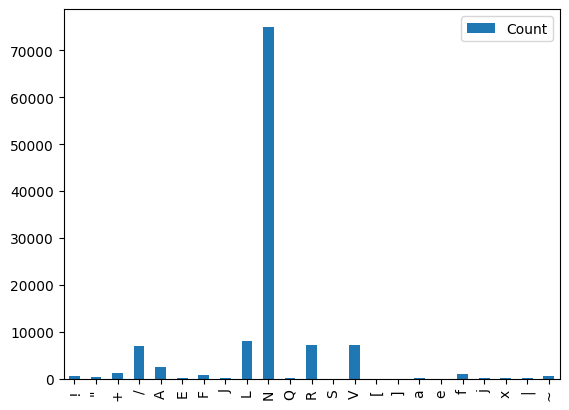

In [15]:
df.plot(kind="bar")

In [16]:
patient_data = dict()
patient_data["id"] = patient_ids

In [17]:
for i in count_tuple[0]:
    patient_data[i] = [0] * len(patient_ids)

In [18]:
patient_data_frame = pd.DataFrame(data=patient_data)

In [19]:
patient_data_frame.set_index("id", inplace=True)

In [20]:
ages = []
gender = []
leads = []
for record_id in patient_data["id"]:
    ecg_record = dr.load_record(record_id)
    ages.append(ecg_record.patient_age())
    gender.append(ecg_record.patient_gender())
    leads.append(ecg_record.leads())
    record_annotation_count_tuple = count_annotations([ecg_record])
    for symbol, count in zip(
        record_annotation_count_tuple[0], record_annotation_count_tuple[1]
    ):
        patient_data_frame.loc[record_id][symbol] = count

In [21]:
patient_data_frame["age"] = np.array(ages)

In [22]:
patient_data_frame["gender"] = np.array(gender)

In [23]:
lead_matrix = np.array(leads)
patient_data_frame["First lead"] = lead_matrix[:, 0]
patient_data_frame["Second Lead"] = lead_matrix[:, 1]

/home/alton/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/home/alton/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


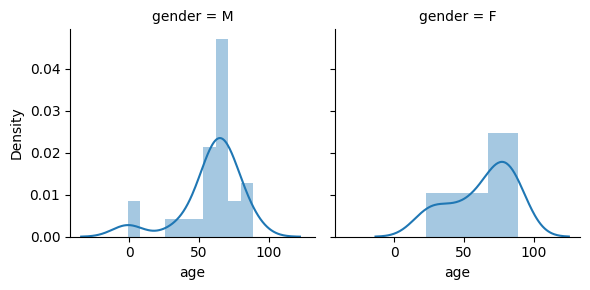

In [24]:
g = sns.FacetGrid(data=patient_data_frame, col="gender")
g.map(sns.distplot, "age")

<Axes: xlabel='gender', ylabel='count'>

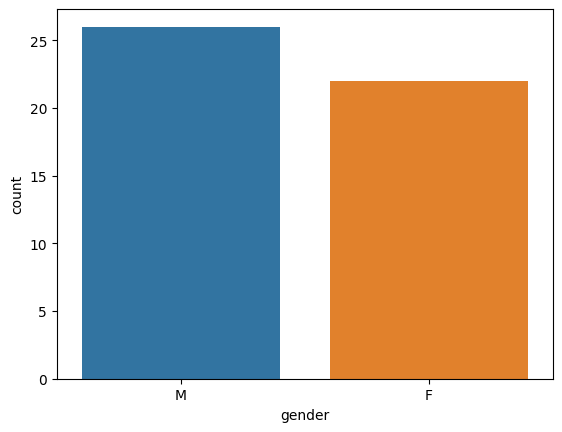

In [25]:
sns.countplot(data=patient_data_frame, x="gender")

/home/alton/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/home/alton/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


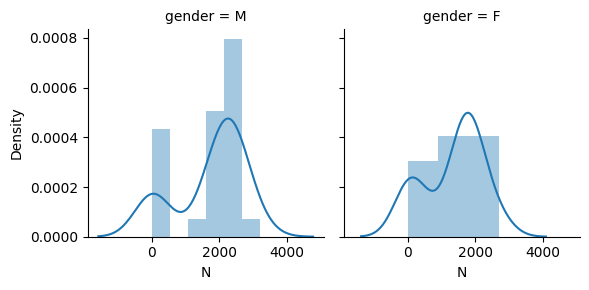

In [26]:
g = sns.FacetGrid(data=patient_data_frame, col="gender")
g.map(sns.distplot, "N")

/home/alton/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/home/alton/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


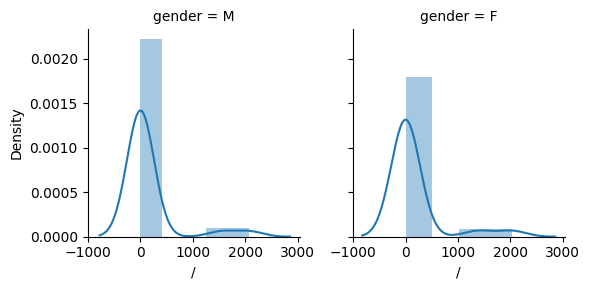

In [27]:
g = sns.FacetGrid(data=patient_data_frame, col="gender")
g.map(sns.distplot, "/")

/home/alton/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/home/alton/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


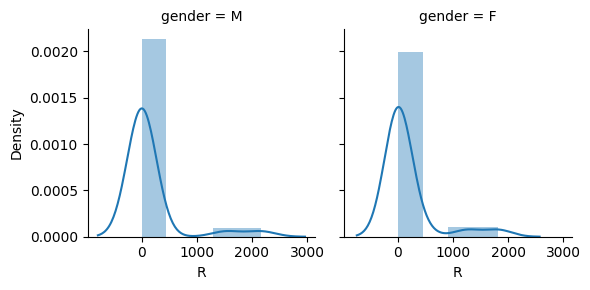

In [28]:
g = sns.FacetGrid(data=patient_data_frame, col="gender")
g.map(sns.distplot, "R")

/home/alton/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/home/alton/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


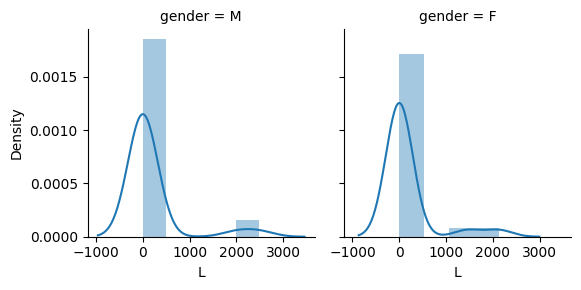

In [29]:
g = sns.FacetGrid(data=patient_data_frame, col="gender")
g.map(sns.distplot, "L")

/home/alton/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/home/alton/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


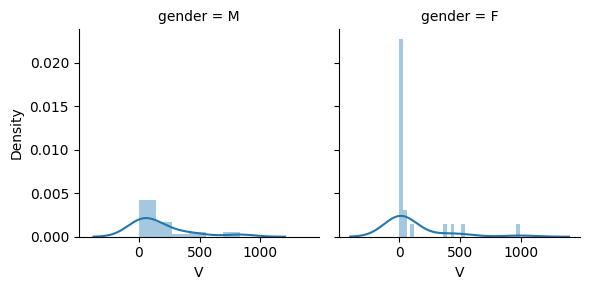

In [30]:
g = sns.FacetGrid(data=patient_data_frame, col="gender")
g.map(sns.distplot, "V")

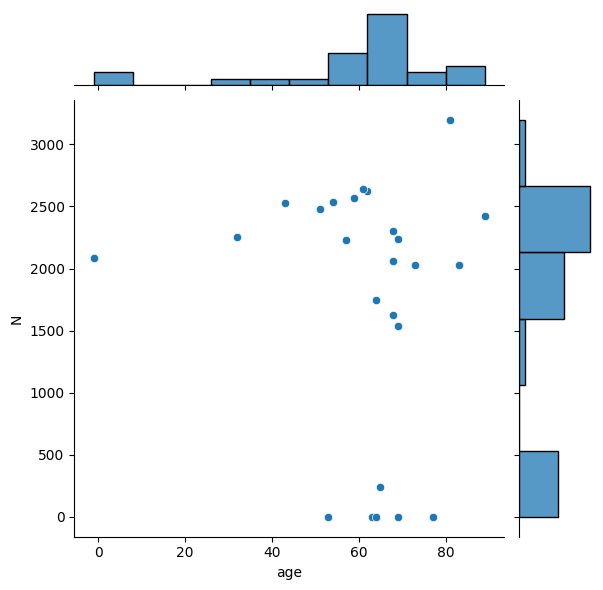

In [31]:
sns.jointplot(
    data=patient_data_frame[patient_data_frame["gender"] == "M"], x="age", y="N"
)

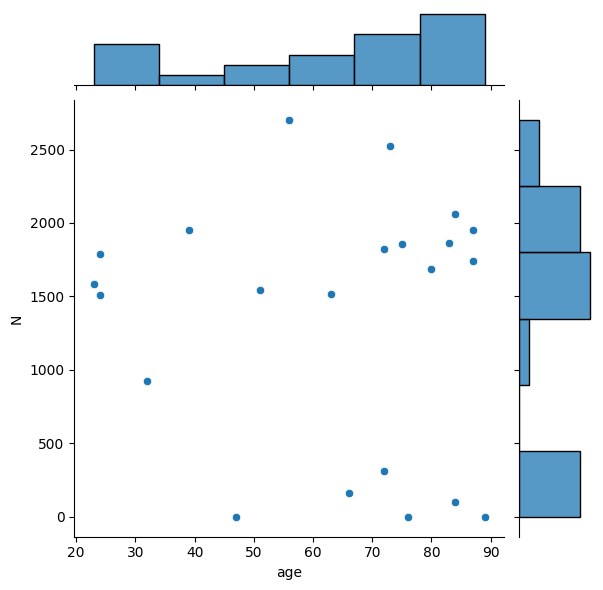

In [32]:
sns.jointplot(
    data=patient_data_frame[patient_data_frame["gender"] == "F"], x="age", y="N"
)

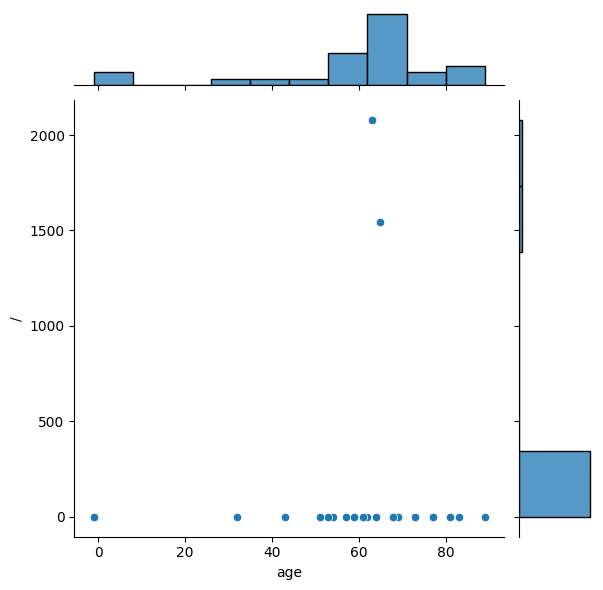

In [33]:
sns.jointplot(
    data=patient_data_frame[patient_data_frame["gender"] == "M"], x="age", y="/"
)

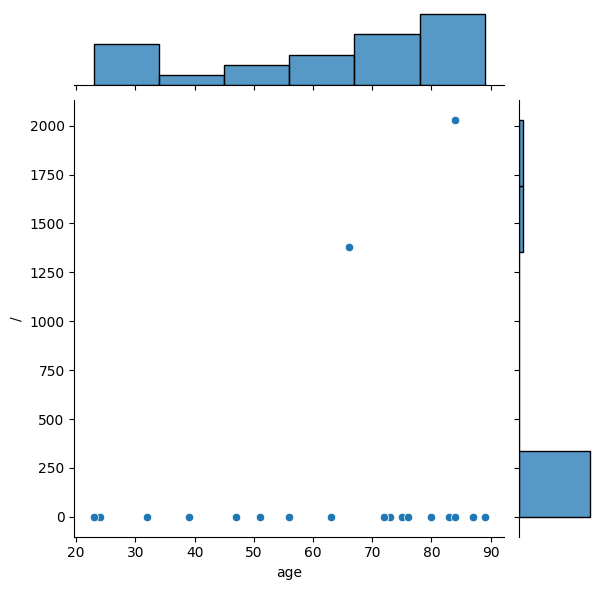

In [34]:
sns.jointplot(
    data=patient_data_frame[patient_data_frame["gender"] == "F"], x="age", y="/"
)

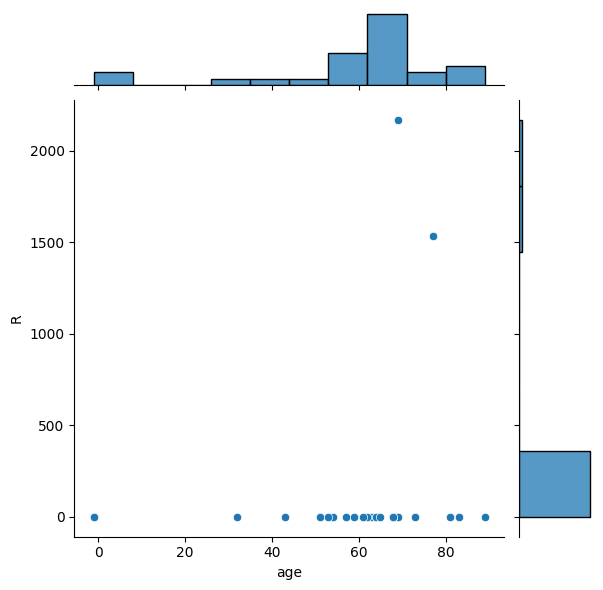

In [35]:
sns.jointplot(
    data=patient_data_frame[patient_data_frame["gender"] == "M"], x="age", y="R"
)

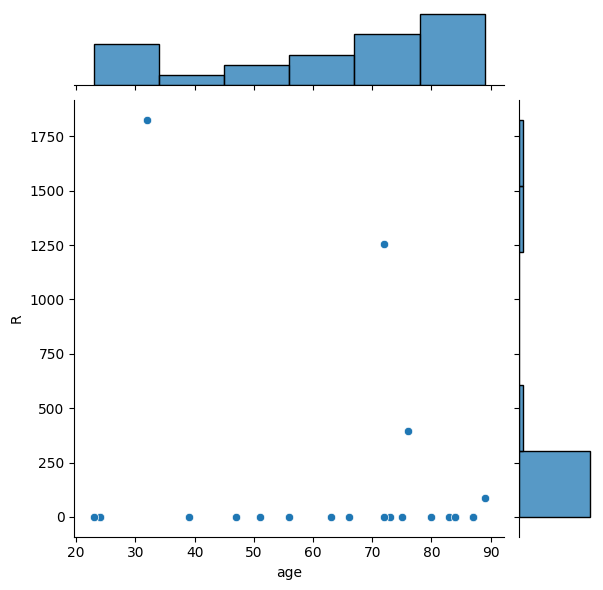

In [36]:
sns.jointplot(
    data=patient_data_frame[patient_data_frame["gender"] == "F"], x="age", y="R"
)

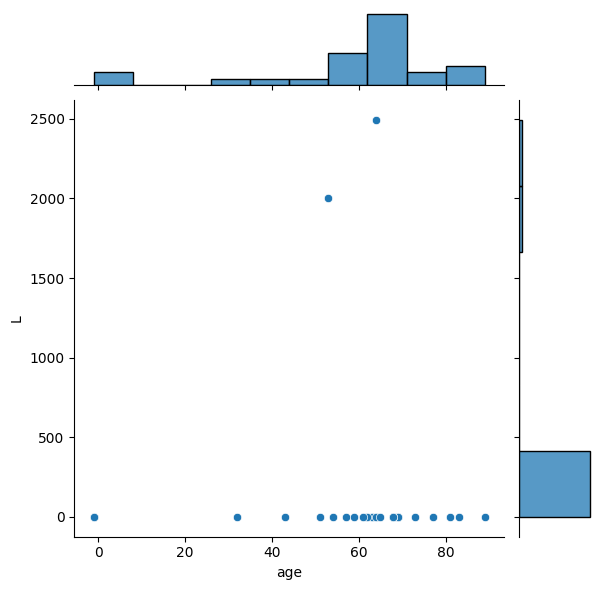

In [37]:
sns.jointplot(
    data=patient_data_frame[patient_data_frame["gender"] == "M"], x="age", y="L"
)

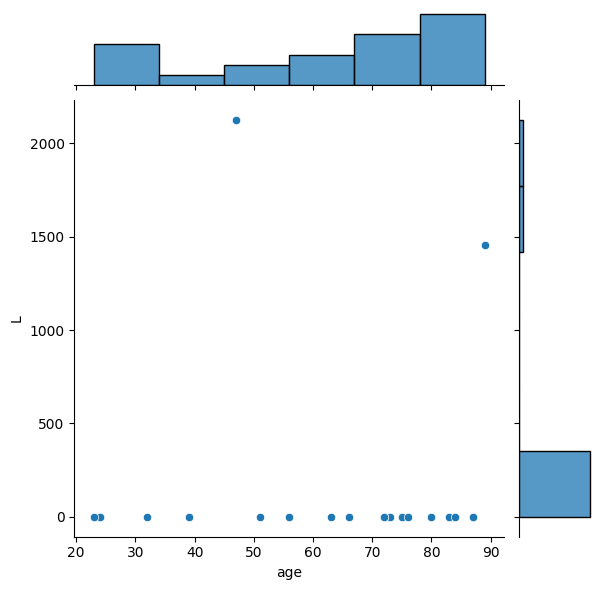

In [38]:
sns.jointplot(
    data=patient_data_frame[patient_data_frame["gender"] == "F"], x="age", y="L"
)

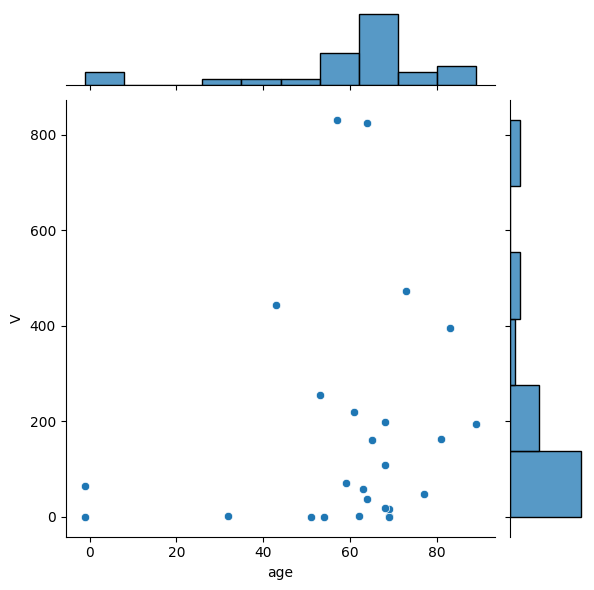

In [39]:
sns.jointplot(
    data=patient_data_frame[patient_data_frame["gender"] == "M"], x="age", y="V"
)

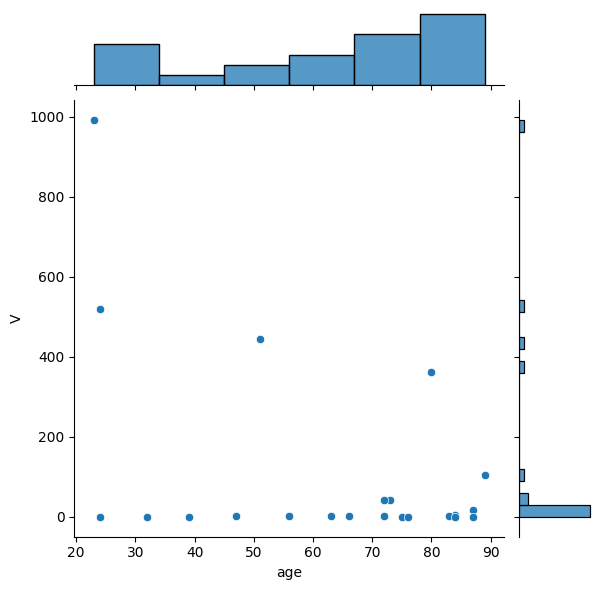

In [40]:
sns.jointplot(
    data=patient_data_frame[patient_data_frame["gender"] == "F"], x="age", y="V"
)

In [41]:
def categorize_age(age):
    if age > 0 and age <= 20:
        return "0-20"
    elif age > 20 and age <= 40:
        return "20-40"
    elif age > 40 and age <= 60:
        return "40-60"
    elif age > 60 and age <= 80:
        return "60-80"
    elif age > 80 and age <= 100:
        return "80-100"
    else:
        return "Invalid"


patient_data_frame["age_category"] = patient_data_frame["age"].apply(categorize_age)

In [42]:
patient_data_frame.head()

,!,"""",+,/,A,E,F,J,L,N,...,f,j,x,|,~,age,gender,First lead,Second Lead,age_category
id,,,,,,,,,,,,,,,,,,,,,
100,0,0,1,0,33,0,0,0,0,2239,...,0,0,0,0,0,69,M,MLII,V5,60-80
101,0,0,1,0,3,0,0,0,0,1860,...,0,0,0,4,4,75,F,MLII,V1,60-80
102,0,0,5,2028,0,0,0,0,0,99,...,56,0,0,0,0,84,F,V5,V2,80-100
103,0,0,1,0,2,0,0,0,0,2082,...,0,0,0,0,6,-1,M,MLII,V2,Invalid
104,0,0,45,1380,0,0,0,0,0,163,...,666,0,0,0,37,66,F,V5,V2,60-80


<Axes: xlabel='age_category', ylabel='N'>

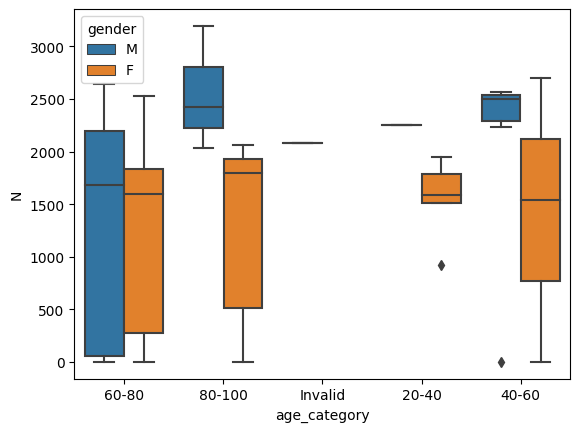

In [43]:
sns.boxplot(data=patient_data_frame, x="age_category", y="N", hue="gender")

<Axes: xlabel='age_category', ylabel='/'>

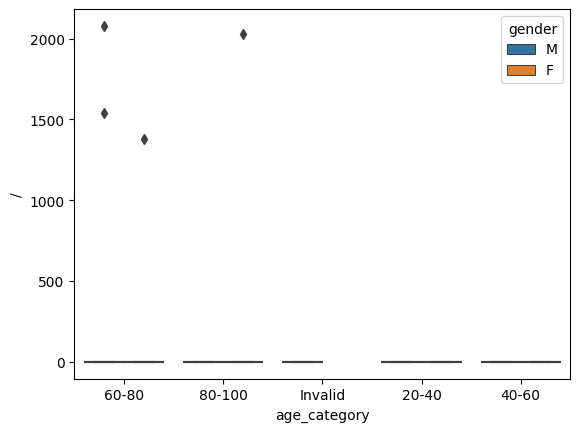

In [44]:
sns.boxplot(data=patient_data_frame, x="age_category", y="/", hue="gender")

<Axes: xlabel='age_category', ylabel='L'>

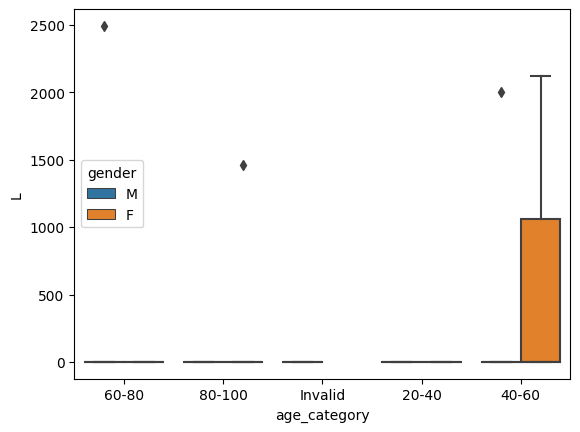

In [45]:
sns.boxplot(data=patient_data_frame, x="age_category", y="L", hue="gender")

<Axes: xlabel='age_category', ylabel='R'>

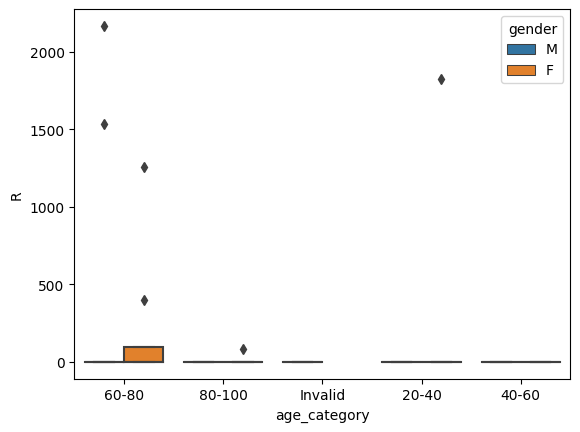

In [46]:
sns.boxplot(data=patient_data_frame, x="age_category", y="R", hue="gender")

<Axes: xlabel='age_category', ylabel='V'>

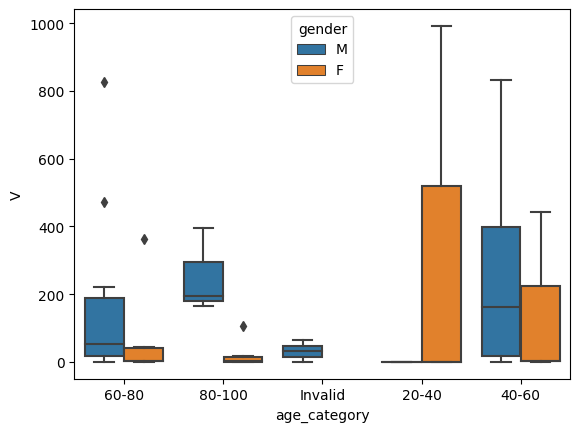

In [47]:
sns.boxplot(data=patient_data_frame, x="age_category", y="V", hue="gender")

<Axes: xlabel='age_category'>

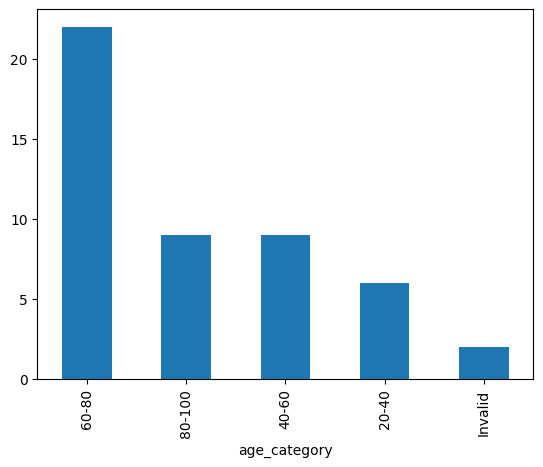

In [48]:
patient_data_frame["age_category"].value_counts().plot(kind="bar")

<Axes: xlabel='First lead'>

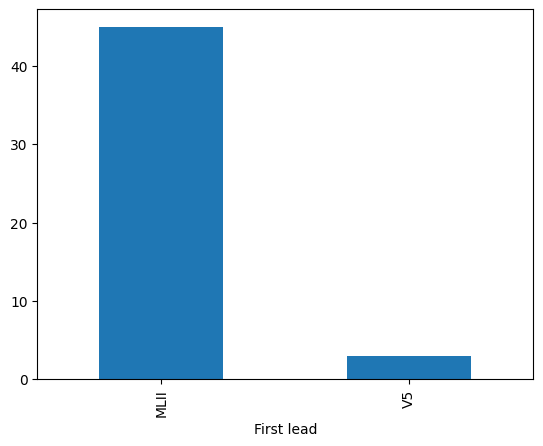

In [49]:
patient_data_frame["First lead"].value_counts().plot(kind="bar")

<Axes: xlabel='Second Lead'>

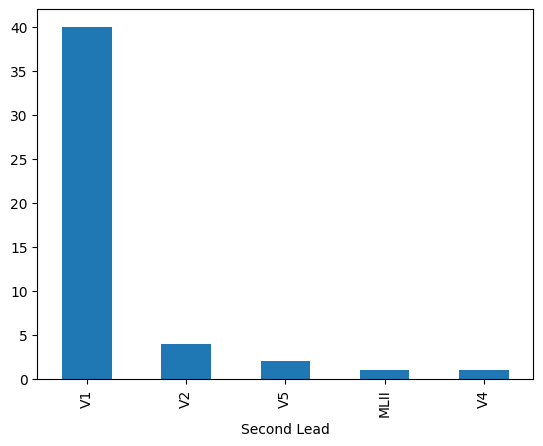

In [50]:
patient_data_frame["Second Lead"].value_counts().plot(kind="bar")

## Data Preprocessing

In [51]:
record100_raw = records[0].ecg_signal()

In [52]:
record100_raw

array([[-0.145, -0.065],
       [-0.145, -0.065],
       [-0.145, -0.065],
       ...,
       [-0.675, -0.365],
       [-0.765, -0.335],
       [-1.28 ,  0.   ]])

### Frequencies Present in the Signal

In [53]:
from scipy.fft import rfft, rfftfreq

In [54]:
yf = rfft(record100_raw[:800, 0])
xf = rfftfreq(len(record100_raw[:800, 0]), 1 / 360)

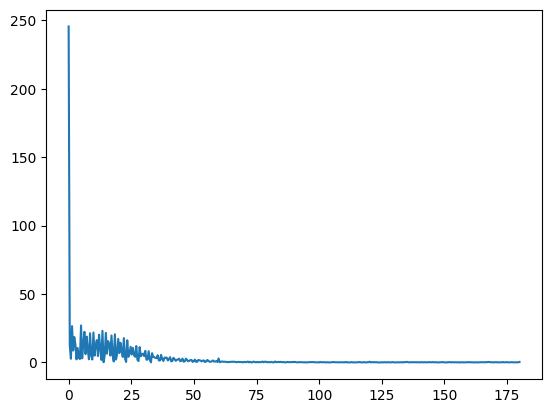

In [55]:
plt.plot(xf, np.abs(yf))

The human ECG spectrum covers the frequency range 0.05 Hz - 100 Hz, with the main part of the QRS complex being in the range 0.5 Hz - 45 Hz. Most of the time the ECG signal is overlaid by the mains frequency of 50 Hz/60 Hz.

### Removing Baseling Wandering

In [56]:
lead_II_signal = record100_raw[:, 0]

In [57]:
lead_II_signal

array([-0.145, -0.145, -0.145, ..., -0.675, -0.765, -1.28 ])

In [58]:
from utils.common_utils import remove_baseline_wander

new_signal_after_removal_of_baseline_wandering = remove_baseline_wander(lead_II_signal)

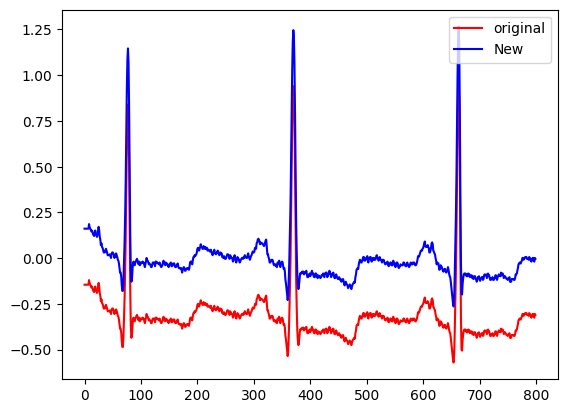

In [59]:
plt.plot(lead_II_signal[:800], color="red")
plt.plot(new_signal_after_removal_of_baseline_wandering[:800], color="blue")
plt.legend(("original", "New"))

### Removing Power Line Interference

In [60]:
from utils.common_utils import remove_powerline_interference

new_signal_after_removal_p_intr = remove_powerline_interference(
    50, new_signal_after_removal_of_baseline_wandering, 360, 2
)

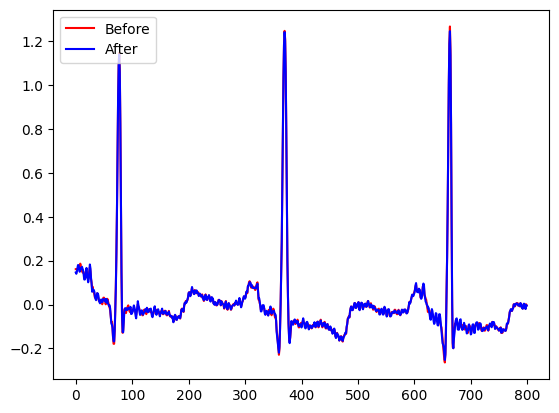

In [61]:
plt.plot(new_signal_after_removal_of_baseline_wandering[:800], color="red")
plt.plot(new_signal_after_removal_p_intr[:800], color="blue")
plt.legend(("Before", "After"))

In [62]:
yf_after = rfft(new_signal_after_removal_p_intr[:800])
xf_after = rfftfreq(len(new_signal_after_removal_p_intr[:800]), 1 / 360)

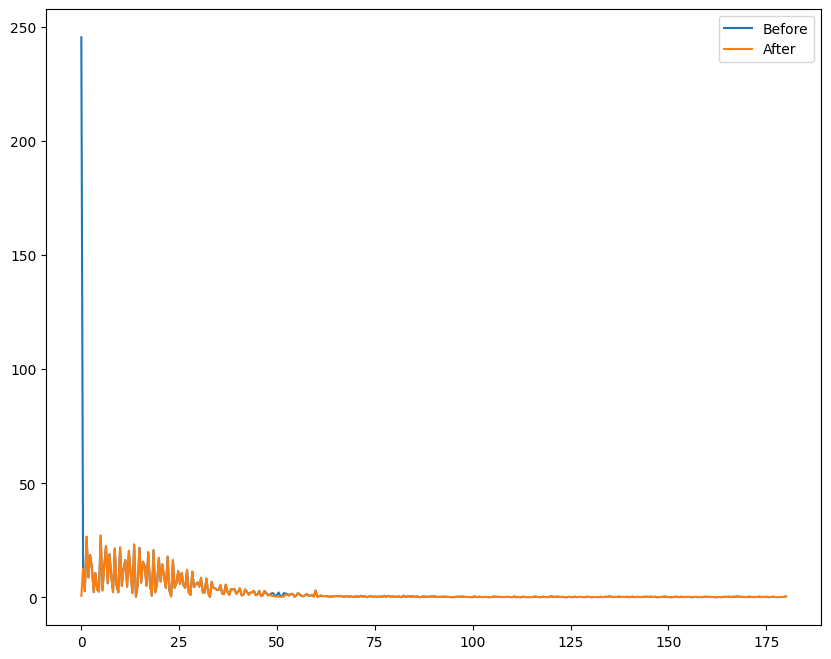

In [63]:
plt.figure(figsize=(10, 8))
plt.plot(xf, np.abs(yf))
plt.plot(xf_after, np.abs(yf_after))
plt.legend(("Before", "After"))

### High Pass Filter at 0.5Hz

In [64]:
from utils.common_utils import high_pass_filter

In [65]:
filteredHighPass = high_pass_filter(new_signal_after_removal_p_intr, 0.5)

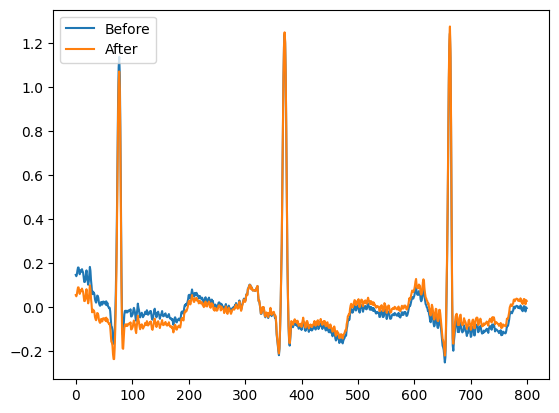

In [66]:
plt.plot(new_signal_after_removal_p_intr[:800])
plt.plot(filteredHighPass[:800])
plt.legend(("Before", "After"))

In [67]:
yf_before = rfft(new_signal_after_removal_p_intr[:800])
xf_before = rfftfreq(len(new_signal_after_removal_p_intr[:800]), 1 / 360)
yf_after = rfft(filteredHighPass[:800])
xf_after = rfftfreq(len(filteredHighPass[:800]), 1 / 360)

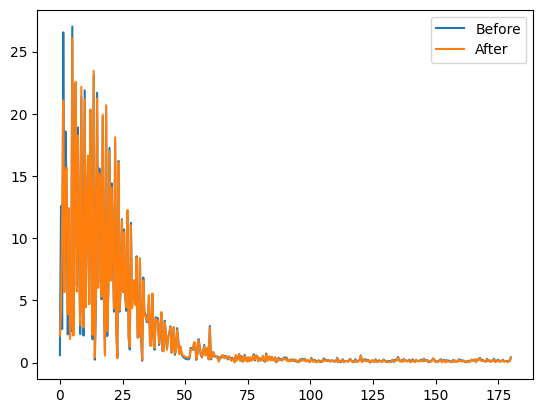

In [68]:
plt.plot(xf_before, np.abs(yf_before))
plt.plot(xf_after, np.abs(yf_after))
plt.legend(("Before", "After"))

### Low Pass Filter with Convolution

In [69]:
from utils.common_utils import hanning_filter

In [70]:
filteredLowPass = hanning_filter(filteredHighPass, 15)

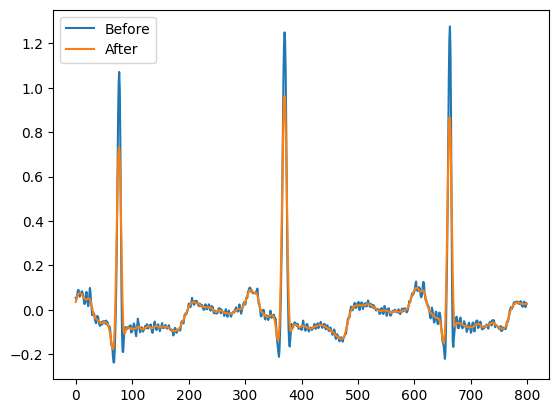

In [71]:
plt.plot(filteredHighPass[:800])
plt.plot(filteredLowPass[:800])
plt.legend(("Before", "After"))

In [72]:
yf_before = rfft(filteredHighPass[:800])
xf_before = rfftfreq(len(filteredHighPass[:800]), 1 / 360)
yf_after = rfft(filteredLowPass[:800])
xf_after = rfftfreq(len(filteredLowPass[:800]), 1 / 360)

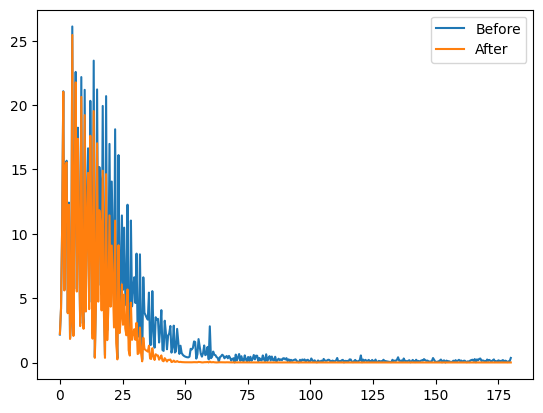

In [73]:
plt.plot(xf_before, np.abs(yf_before))
plt.plot(xf_after, np.abs(yf_after))
plt.legend(("Before", "After"))

### Segmentation

In [74]:
from data_set_utils.data_generator import DataMaker

In [75]:
dm = DataMaker(records, 50, 360, "MLII", 15, 0.5, 2, 45, 49)

In [76]:
ecg_segments = dm.perform_segmentation(symbols_of_interest)

No MLII for 102
No MLII for 104


### Data Frame Preparation

In [135]:
readings = list()
record_ids = list()
segment_starts = list()
segment_ends = list()
annotation_class = list()

In [136]:
for segment in ecg_segments:
    if len(segment.get_readings()) == 94 and any(
        [ann.get_symbol() in symbols_of_interest for ann in segment.get_annotations()]
    ):
        readings.append(segment.get_readings())
        record_ids.append(segment.get_record_id())
        start, stop = segment.get_segment_positions()
        segment_starts.append(start)
        segment_ends.append(stop)
        for ann in segment.get_annotations():
            if ann.get_symbol() in symbols_of_interest:
                annotation_class.append(ann.get_symbol())
    else:
        print(f"Skipping {segment.get_record_id()}")
        print(f"Size:{len(segment.get_readings())}")
        print(f"Segment:{segment.get_segment_positions()}")
        print(f" Annotations:{[ann.get_symbol() for ann in segment.get_annotations()]}")
        print("++++++++++++++++++++++++++++++++++++++++++++++++++++")

Skipping 100
Size:94
Segment:(2014, 2108)
 Annotations:['A']
++++++++++++++++++++++++++++++++++++++++++++++++++++
Skipping 100
Size:94
Segment:(66761, 66855)
 Annotations:['A']
++++++++++++++++++++++++++++++++++++++++++++++++++++
Skipping 100
Size:94
Segment:(74978, 75072)
 Annotations:['A']
++++++++++++++++++++++++++++++++++++++++++++++++++++
Skipping 100
Size:94
Segment:(99573, 99667)
 Annotations:['A']
++++++++++++++++++++++++++++++++++++++++++++++++++++
Skipping 100
Size:94
Segment:(128078, 128172)
 Annotations:['A']
++++++++++++++++++++++++++++++++++++++++++++++++++++
Skipping 100
Size:94
Segment:(170709, 170803)
 Annotations:['A']
++++++++++++++++++++++++++++++++++++++++++++++++++++
Skipping 100
Size:94
Segment:(279545, 279639)
 Annotations:['A']
++++++++++++++++++++++++++++++++++++++++++++++++++++
Skipping 100
Size:94
Segment:(305664, 305758)
 Annotations:['A']
++++++++++++++++++++++++++++++++++++++++++++++++++++
Skipping 100
Size:94
Segment:(307738, 307832)
 Annotations:['A']
+

Skipping 112
Size:94
Segment:(253567, 253661)
 Annotations:['A']
++++++++++++++++++++++++++++++++++++++++++++++++++++
Skipping 112
Size:94
Segment:(278477, 278571)
 Annotations:['A']
++++++++++++++++++++++++++++++++++++++++++++++++++++
Skipping 113
Size:94
Segment:(8614, 8708)
 Annotations:['a']
++++++++++++++++++++++++++++++++++++++++++++++++++++
Skipping 113
Size:94
Segment:(142022, 142116)
 Annotations:['a']
++++++++++++++++++++++++++++++++++++++++++++++++++++
Skipping 113
Size:94
Segment:(146683, 146777)
 Annotations:['a']
++++++++++++++++++++++++++++++++++++++++++++++++++++
Skipping 113
Size:94
Segment:(182991, 183085)
 Annotations:['a']
++++++++++++++++++++++++++++++++++++++++++++++++++++
Skipping 113
Size:94
Segment:(457046, 457140)
 Annotations:['a']
++++++++++++++++++++++++++++++++++++++++++++++++++++
Skipping 113
Size:94
Segment:(481188, 481282)
 Annotations:['a']
++++++++++++++++++++++++++++++++++++++++++++++++++++
Skipping 114
Size:94
Segment:(79, 173)
 Annotations:[]
+++++

Skipping 200
Size:94
Segment:(75486, 75580)
 Annotations:['A']
++++++++++++++++++++++++++++++++++++++++++++++++++++
Skipping 200
Size:94
Segment:(85951, 86045)
 Annotations:['A']
++++++++++++++++++++++++++++++++++++++++++++++++++++
Skipping 200
Size:94
Segment:(153331, 153425)
 Annotations:['A']
++++++++++++++++++++++++++++++++++++++++++++++++++++
Skipping 200
Size:94
Segment:(160714, 160808)
 Annotations:['A']
++++++++++++++++++++++++++++++++++++++++++++++++++++
Skipping 200
Size:94
Segment:(186953, 187047)
 Annotations:['A']
++++++++++++++++++++++++++++++++++++++++++++++++++++
Skipping 200
Size:94
Segment:(218869, 218963)
 Annotations:['F']
++++++++++++++++++++++++++++++++++++++++++++++++++++
Skipping 200
Size:94
Segment:(225888, 225982)
 Annotations:['A', '~']
++++++++++++++++++++++++++++++++++++++++++++++++++++
Skipping 200
Size:94
Segment:(254869, 254963)
 Annotations:['A']
++++++++++++++++++++++++++++++++++++++++++++++++++++
Skipping 200
Size:94
Segment:(260595, 260689)
 Annotati

Skipping 208
Size:94
Segment:(575808, 575902)
 Annotations:[]
++++++++++++++++++++++++++++++++++++++++++++++++++++
Skipping 208
Size:94
Segment:(576542, 576636)
 Annotations:[]
++++++++++++++++++++++++++++++++++++++++++++++++++++
Skipping 208
Size:94
Segment:(578702, 578796)
 Annotations:[]
++++++++++++++++++++++++++++++++++++++++++++++++++++
Skipping 208
Size:94
Segment:(581302, 581396)
 Annotations:[]
++++++++++++++++++++++++++++++++++++++++++++++++++++
Skipping 208
Size:94
Segment:(581904, 581998)
 Annotations:[]
++++++++++++++++++++++++++++++++++++++++++++++++++++
Skipping 208
Size:94
Segment:(583381, 583475)
 Annotations:[]
++++++++++++++++++++++++++++++++++++++++++++++++++++
Skipping 208
Size:94
Segment:(587182, 587276)
 Annotations:['F']
++++++++++++++++++++++++++++++++++++++++++++++++++++
Skipping 208
Size:94
Segment:(587919, 588013)
 Annotations:[]
++++++++++++++++++++++++++++++++++++++++++++++++++++
Skipping 208
Size:94
Segment:(590731, 590825)
 Annotations:[]
+++++++++++++++

Skipping 214
Size:94
Segment:(603640, 603734)
 Annotations:['F']
++++++++++++++++++++++++++++++++++++++++++++++++++++
Skipping 215
Size:94
Segment:(67438, 67532)
 Annotations:[]
++++++++++++++++++++++++++++++++++++++++++++++++++++
Skipping 215
Size:94
Segment:(102714, 102808)
 Annotations:['A']
++++++++++++++++++++++++++++++++++++++++++++++++++++
Skipping 215
Size:94
Segment:(137211, 137305)
 Annotations:['A']
++++++++++++++++++++++++++++++++++++++++++++++++++++
Skipping 215
Size:94
Segment:(213037, 213131)
 Annotations:['A']
++++++++++++++++++++++++++++++++++++++++++++++++++++
Skipping 215
Size:94
Segment:(469767, 469861)
 Annotations:[]
++++++++++++++++++++++++++++++++++++++++++++++++++++
Skipping 215
Size:94
Segment:(526247, 526341)
 Annotations:[]
++++++++++++++++++++++++++++++++++++++++++++++++++++
Skipping 217
Size:94
Segment:(75, 169)
 Annotations:['+']
++++++++++++++++++++++++++++++++++++++++++++++++++++
Skipping 217
Size:94
Segment:(1711, 1805)
 Annotations:['f']
+++++++++++++

Skipping 231
Size:94
Segment:(78, 172)
 Annotations:[]
++++++++++++++++++++++++++++++++++++++++++++++++++++
Skipping 231
Size:94
Segment:(5741, 5835)
 Annotations:[]
++++++++++++++++++++++++++++++++++++++++++++++++++++
Skipping 231
Size:94
Segment:(6800, 6894)
 Annotations:[]
++++++++++++++++++++++++++++++++++++++++++++++++++++
Skipping 231
Size:94
Segment:(7481, 7575)
 Annotations:[]
++++++++++++++++++++++++++++++++++++++++++++++++++++
Skipping 231
Size:94
Segment:(10539, 10633)
 Annotations:[]
++++++++++++++++++++++++++++++++++++++++++++++++++++
Skipping 231
Size:94
Segment:(14969, 15063)
 Annotations:[]
++++++++++++++++++++++++++++++++++++++++++++++++++++
Skipping 231
Size:94
Segment:(17019, 17113)
 Annotations:[]
++++++++++++++++++++++++++++++++++++++++++++++++++++
Skipping 231
Size:94
Segment:(22061, 22155)
 Annotations:[]
++++++++++++++++++++++++++++++++++++++++++++++++++++
Skipping 231
Size:94
Segment:(29594, 29688)
 Annotations:[]
+++++++++++++++++++++++++++++++++++++++++++++++

In [137]:
readings = np.array(readings)

In [138]:
readings.shape

(97721, 94)

In [139]:
ecg_data = pd.DataFrame(readings, columns=range(0, 94))

In [140]:
ecg_data

,0,1,2,3,4,5,6,7,8,9,...,84,85,86,87,88,89,90,91,92,93
0,-0.133758,-0.076139,0.010776,0.126579,0.265184,0.413853,0.554145,0.665022,0.727727,0.730722,...,-0.076883,-0.076107,-0.075396,-0.075049,-0.075213,-0.075753,-0.076414,-0.076974,-0.077349,-0.077768
1,0.009189,0.115450,0.250063,0.405618,0.569579,0.725254,0.853842,0.937646,0.963932,0.927943,...,-0.081902,-0.083437,-0.084935,-0.086651,-0.088757,-0.091097,-0.093324,-0.095219,-0.096983,-0.098989
2,0.077451,0.068057,0.056954,0.045413,0.034412,0.024280,0.014976,0.006582,-0.000558,-0.006146,...,-0.078501,-0.077942,-0.076773,-0.075058,-0.072915,-0.070623,-0.068465,-0.066422,-0.064540,-0.063050
3,-0.143957,-0.068804,0.036461,0.170194,0.324927,0.486758,0.636127,0.750722,0.810738,0.804771,...,-0.045986,-0.045773,-0.045660,-0.045819,-0.046220,-0.046655,-0.046973,-0.047163,-0.047316,-0.047517
4,-0.084441,-0.013992,0.089543,0.222794,0.374752,0.526586,0.654855,0.737464,0.759594,0.717333,...,-0.072028,-0.072936,-0.074301,-0.076179,-0.078752,-0.082192,-0.086423,-0.091002,-0.095369,-0.099428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97716,-0.032447,-0.047289,-0.059375,-0.068874,-0.076097,-0.081310,-0.084741,-0.086736,-0.087841,-0.088779,...,-0.132292,-0.131761,-0.131380,-0.130449,-0.128389,-0.125071,-0.120789,-0.116081,-0.111380,-0.106989
97717,0.154349,0.147389,0.138994,0.129523,0.119118,0.107644,0.094830,0.080425,0.064218,0.046173,...,-0.171448,-0.174203,-0.176732,-0.178175,-0.177934,-0.175725,-0.171513,-0.165583,-0.158580,-0.151423
97718,-0.102561,-0.111589,-0.118131,-0.122756,-0.126167,-0.129058,-0.132012,-0.135386,-0.139379,-0.144140,...,-0.193148,-0.193154,-0.191135,-0.186792,-0.180668,-0.173941,-0.167881,-0.163423,-0.161045,-0.160636
97719,-0.118322,-0.124277,-0.129339,-0.133852,-0.137898,-0.141421,-0.144161,-0.145932,-0.146686,-0.146448,...,-0.146252,-0.141161,-0.136027,-0.131359,-0.127532,-0.124599,-0.122323,-0.120267,-0.118026,-0.115133


In [141]:
ecg_data["Record ID"] = np.array(record_ids)
ecg_data["Segment Start"] = np.array(segment_starts)
ecg_data["Segment End"] = np.array(segment_ends)
ecg_data["Annotation Class"] = np.array(annotation_class)

In [142]:
ecg_data.head()

,0,1,2,3,4,5,6,7,8,9,...,88,89,90,91,92,93,Record ID,Segment Start,Segment End,Annotation Class
0,-0.133758,-0.076139,0.010776,0.126579,0.265184,0.413853,0.554145,0.665022,0.727727,0.730722,...,-0.075213,-0.075753,-0.076414,-0.076974,-0.077349,-0.077768,100,68,162,N
1,0.009189,0.115450,0.250063,0.405618,0.569579,0.725254,0.853842,0.937646,0.963932,0.927943,...,-0.088757,-0.091097,-0.093324,-0.095219,-0.096983,-0.098989,100,362,456,N
2,0.077451,0.068057,0.056954,0.045413,0.034412,0.024280,0.014976,0.006582,-0.000558,-0.006146,...,-0.072915,-0.070623,-0.068465,-0.066422,-0.064540,-0.063050,100,618,712,N
3,-0.143957,-0.068804,0.036461,0.170194,0.324927,0.486758,0.636127,0.750722,0.810738,0.804771,...,-0.046220,-0.046655,-0.046973,-0.047163,-0.047316,-0.047517,100,938,1032,N
4,-0.084441,-0.013992,0.089543,0.222794,0.374752,0.526586,0.654855,0.737464,0.759594,0.717333,...,-0.078752,-0.082192,-0.086423,-0.091002,-0.095369,-0.099428,100,1223,1317,N


In [143]:
for i, column_to_move in enumerate(["Record ID", "Segment Start", "Segment End"]):
    column = ecg_data.pop(column_to_move)
    ecg_data.insert(i, column_to_move, column)

In [144]:
ecg_data.head()

,Record ID,Segment Start,Segment End,0,1,2,3,4,5,6,...,85,86,87,88,89,90,91,92,93,Annotation Class
0,100,68,162,-0.133758,-0.076139,0.010776,0.126579,0.265184,0.413853,0.554145,...,-0.076107,-0.075396,-0.075049,-0.075213,-0.075753,-0.076414,-0.076974,-0.077349,-0.077768,N
1,100,362,456,0.009189,0.115450,0.250063,0.405618,0.569579,0.725254,0.853842,...,-0.083437,-0.084935,-0.086651,-0.088757,-0.091097,-0.093324,-0.095219,-0.096983,-0.098989,N
2,100,618,712,0.077451,0.068057,0.056954,0.045413,0.034412,0.024280,0.014976,...,-0.077942,-0.076773,-0.075058,-0.072915,-0.070623,-0.068465,-0.066422,-0.064540,-0.063050,N
3,100,938,1032,-0.143957,-0.068804,0.036461,0.170194,0.324927,0.486758,0.636127,...,-0.045773,-0.045660,-0.045819,-0.046220,-0.046655,-0.046973,-0.047163,-0.047316,-0.047517,N
4,100,1223,1317,-0.084441,-0.013992,0.089543,0.222794,0.374752,0.526586,0.654855,...,-0.072936,-0.074301,-0.076179,-0.078752,-0.082192,-0.086423,-0.091002,-0.095369,-0.099428,N


In [146]:
ecg_data["Annotation Class"].value_counts()

Annotation Class
N    73343
L     8068
R     6968
V     6615
/     2727
Name: count, dtype: int64

<Axes: xlabel='Annotation Class'>

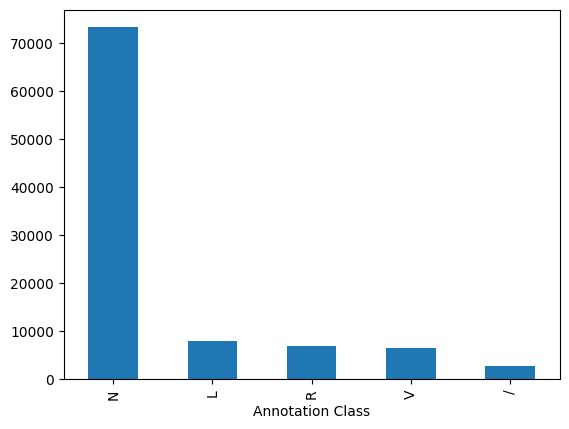

In [147]:
ecg_data["Annotation Class"].value_counts().plot(kind="bar")

### Training Data Size For Each Class

In [151]:
np.floor(0.6 * 2727) - 1

1635.0